In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import numpy as np

import sys
sys.path.append('./..')

from refuelplot import *
setup()
sns.set_style("darkgrid")

In [2]:
tx_path = '/data/users/kgruber/other-data/TX/'
res_path = '/data/users/kgruber/results/TX/'
load_path = '/data/users/kgruber/other-data/TX/Load/'

### load outages

In [4]:
outages = pd.read_feather(tx_path + 'outages.feather')
outages = outages[outages.dataset=='edgar'].drop('dataset',axis=1)

/home/kgruber/.conda/envs/py37/lib/python3.7/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [5]:
outages_hourly = pd.read_feather(tx_path + 'outages-hourly.feather')

In [6]:
out = outages.groupby(['ts','fuel']).sum().reset_index().rename({'ts':'time',
                                                                 'cap_available':'available_cap',
                                                                 'reduction':'reduction_cap'},axis=1)

### split between north and south

In [7]:
latlimit = 30

In [8]:
outN = outages[outages.Latitude>latlimit].groupby(['ts','fuel']).sum().reset_index().rename({'ts':'time',
                                                                 'cap_available':'available_cap',
                                                                 'reduction':'reduction_cap'},axis=1)
outS = outages[outages.Latitude<=latlimit].groupby(['ts','fuel']).sum().reset_index().rename({'ts':'time',
                                                                 'cap_available':'available_cap',
                                                                 'reduction':'reduction_cap'},axis=1)

In [9]:
outN_NG = outN[outN.fuel=='NG'].set_index('time').resample('H').mean()
outN_WIND = outN[outN.fuel=='WIND'].set_index('time').resample('H').mean()
outN_SOLAR = outN[outN.fuel=='SOLAR'].set_index('time').resample('H').mean()
outN_COAL = outN[outN.fuel=='COAL'].set_index('time').resample('H').mean()
outN_ESR = outN[outN.fuel=='ESR'].set_index('time').resample('H').mean()
outN_HYDRO = outN[outN.fuel=='HYRO'].set_index('time').resample('H').mean()
outN_NUCLEAR = outN[outN.fuel=='NUCLEAR'].set_index('time').resample('H').mean()

outS_NG = outS[outS.fuel=='NG'].set_index('time').resample('H').mean()
outS_WIND = outS[outS.fuel=='WIND'].set_index('time').resample('H').mean()
outS_SOLAR = outS[outS.fuel=='SOLAR'].set_index('time').resample('H').mean()
outS_COAL = outS[outS.fuel=='COAL'].set_index('time').resample('H').mean()
outS_ESR = outS[outS.fuel=='ESR'].set_index('time').resample('H').mean()
outS_HYDRO = outS[outS.fuel=='HYRO'].set_index('time').resample('H').mean()
outS_NUCLEAR = outS[outS.fuel=='NUCLEAR'].set_index('time').resample('H').mean()

In [11]:
availableN = pd.DataFrame({'NG':outN_NG.available_cap,
                          'WIND':outN_WIND.available_cap,
                          'SOLAR':outN_SOLAR.available_cap,
                          'COAL':outN_COAL.available_cap,
                          'ESR':outN_ESR.available_cap,
                          'HYDRO':outN_HYDRO.available_cap,
                          'NUCLEAR':outN_NUCLEAR.available_cap})
availableS = pd.DataFrame({'NG':outS_NG.available_cap,
                          'WIND':outS_WIND.available_cap,
                          'SOLAR':outS_SOLAR.available_cap,
                          'COAL':outS_COAL.available_cap,
                          'ESR':outS_ESR.available_cap,
                          'HYDRO':outS_HYDRO.available_cap,
                          'NUCLEAR':outS_NUCLEAR.available_cap})

In [12]:
reductionN = pd.DataFrame({'NG':outN_NG.reduction_cap,
                          'WIND':outN_WIND.reduction_cap,
                          'SOLAR':outN_SOLAR.reduction_cap,
                          'COAL':outN_COAL.reduction_cap,
                          'ESR':outN_ESR.reduction_cap,
                          'HYDRO':outN_HYDRO.reduction_cap,
                          'NUCLEAR':outN_NUCLEAR.reduction_cap})
reductionS = pd.DataFrame({'NG':outS_NG.reduction_cap,
                          'WIND':outS_WIND.reduction_cap,
                          'SOLAR':outS_SOLAR.reduction_cap,
                          'COAL':outS_COAL.reduction_cap,
                          'ESR':outS_ESR.reduction_cap,
                          'HYDRO':outS_HYDRO.reduction_cap,
                          'NUCLEAR':outS_NUCLEAR.reduction_cap})

In [13]:
availableN.index = availableN.index.tz_localize(None).tz_localize('Etc/GMT+6')
reductionN.index = reductionN.index.tz_localize(None).tz_localize('Etc/GMT+6')
availableS.index = availableS.index.tz_localize(None).tz_localize('Etc/GMT+6')
reductionS.index = reductionS.index.tz_localize(None).tz_localize('Etc/GMT+6')

In [14]:
availableN.to_csv(tx_path+'outages_availableNorth.csv')
reductionN.to_csv(tx_path+'outages_reductionNorth.csv')
availableS.to_csv(tx_path+'outages_availableSouth.csv')
reductionS.to_csv(tx_path+'outages_reductionSouth.csv')

Text(0, 0.5, 'MWh')

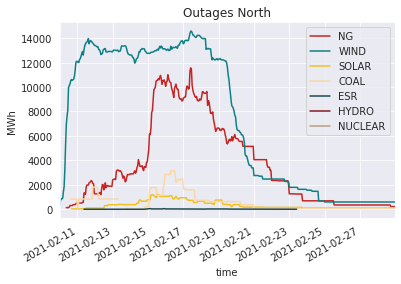

In [15]:
reductionN['2021-02'].plot()
plt.title('Outages North')
plt.ylabel('MWh')

Text(0, 0.5, 'MWh')

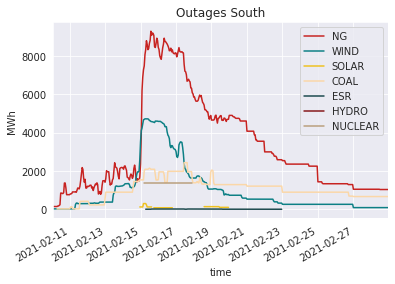

In [16]:
reductionS['2021-02'].plot()
plt.title('Outages South')
plt.ylabel('MWh')

### use hourly data

In [94]:
outN_h = outages_hourly[outages_hourly.Latitude>latlimit].groupby('fuel').sum().reset_index().rename({'dt_aggregate':'time',
                                                                  'cap_available':'available_cap',
                                                                 'reduction':'reduction_cap'},axis=1)
outS_h = outages_hourly[outages_hourly.Latitude<=latlimit].groupby('fuel').sum().reset_index().rename({'dt_aggregate':'time',
                                                                 'cap_available':'available_cap',
                                                                 'reduction':'reduction_cap'},axis=1)

In [97]:
outages_hourly

,dt_aggregate,station,unit,fuel,fullname,dataset,Longitude,Latitude,reduction,cap_available,cap_max
0,2021-02-10 00:00:00+00:00,KEECHI,U1,WIND,KEECHI.U1,new,0.000000,0.000000,110.0,0.0,110.0
1,2021-02-10 00:00:00+00:00,Keechi Wind,U1,WIND,Keechi Wind.U1,edgar,-98.161111,33.143056,110.0,0.0,110.0
2,2021-02-10 00:00:00+00:00,NBOHR,UNIT1,WIND,NBOHR.UNIT1,new,0.000000,0.000000,177.0,20.0,197.0
3,2021-02-10 00:00:00+00:00,Niels Bohr,UNIT1,WIND,Niels Bohr.UNIT1,edgar,-101.582000,31.727237,177.0,20.0,197.0
4,2021-02-10 01:00:00+00:00,BLSUMIT3,UNIT_17,WIND,BLSUMIT3.UNIT_17,new,0.000000,0.000000,12.0,1.0,13.0
5,2021-02-10 01:00:00+00:00,BLSUMIT3,UNIT_25,WIND,BLSUMIT3.UNIT_25,new,0.000000,0.000000,177.0,5.0,182.0
6,2021-02-10 01:00:00+00:00,BLSUMMIT,BLSMT1_5,WIND,BLSUMMIT.BLSMT1_5,new,0.000000,0.000000,8.0,1.0,9.0
7,2021-02-10 01:00:00+00:00,BLSUMMIT,BLSMT1_6,WIND,BLSUMMIT.BLSMT1_6,new,0.000000,0.000000,124.0,0.0,124.0
8,2021-02-10 01:00:00+00:00,BLSUMMIT,UNIT2_17,WIND,BLSUMMIT.UNIT2_17,new,0.000000,0.000000,6.0,1.0,7.0
9,2021-02-10 01:00:00+00:00,BLSUMMIT,UNIT2_25,WIND,BLSUMMIT.UNIT2_25,new,0.000000,0.000000,86.0,4.0,90.0


/home/kgruber/.conda/envs/py37/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


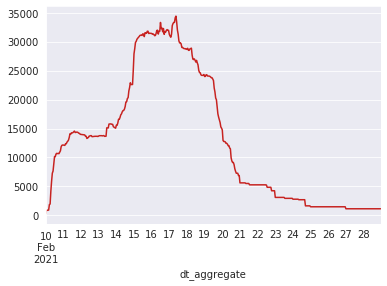

In [95]:
outages_hourly[(outages_hourly.Latitude<=latlimit)&(outages_hourly.fuel=='WIND')].groupby('dt_aggregate').sum().reduction.plot()

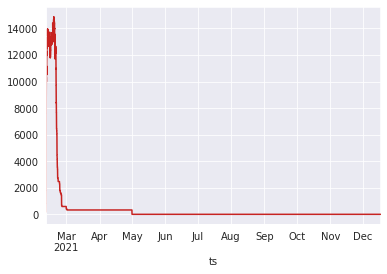

In [80]:
outages[(outages.Latitude>latlimit)&(outages.fuel=='WIND')].groupby(['ts']).sum().reduction.plot()#.resample('H').mean().plot()

In [51]:
outN_NG = outN[outN.fuel=='NG'].set_index('time').resample('H').mean()
outN_WIND = outN[outN.fuel=='WIND'].set_index('time').resample('H').mean()
outN_SOLAR = outN[outN.fuel=='SOLAR'].set_index('time').resample('H').mean()
outN_COAL = outN[outN.fuel=='COAL'].set_index('time').resample('H').mean()
outN_ESR = outN[outN.fuel=='ESR'].set_index('time').resample('H').mean()
outN_HYDRO = outN[outN.fuel=='HYRO'].set_index('time').resample('H').mean()
outN_NUCLEAR = outN[outN.fuel=='NUCLEAR'].set_index('time').resample('H').mean()

outS_NG = outS[outS.fuel=='NG'].set_index('time').resample('H').mean()
outS_WIND = outS[outS.fuel=='WIND'].set_index('time').resample('H').mean()
outS_SOLAR = outS[outS.fuel=='SOLAR'].set_index('time').resample('H').mean()
outS_COAL = outS[outS.fuel=='COAL'].set_index('time').resample('H').mean()
outS_ESR = outS[outS.fuel=='ESR'].set_index('time').resample('H').mean()
outS_HYDRO = outS[outS.fuel=='HYRO'].set_index('time').resample('H').mean()
outS_NUCLEAR = outS[outS.fuel=='NUCLEAR'].set_index('time').resample('H').mean()

In [52]:
availableN = pd.DataFrame({'NG':outN_NG.available_cap,
                          'WIND':outN_WIND.available_cap,
                          'SOLAR':outN_SOLAR.available_cap,
                          'COAL':outN_COAL.available_cap,
                          'ESR':outN_ESR.available_cap,
                          'HYDRO':outN_HYDRO.available_cap,
                          'NUCLEAR':out_NUCLEAR.available_cap})
availableS = pd.DataFrame({'NG':outS_NG.available_cap,
                          'WIND':outS_WIND.available_cap,
                          'SOLAR':outS_SOLAR.available_cap,
                          'COAL':outS_COAL.available_cap,
                          'ESR':outS_ESR.available_cap,
                          'HYDRO':outS_HYDRO.available_cap,
                          'NUCLEAR':outS_NUCLEAR.available_cap})

In [53]:
reductionN = pd.DataFrame({'NG':outN_NG.reduction_cap,
                          'WIND':outN_WIND.reduction_cap,
                          'SOLAR':outN_SOLAR.reduction_cap,
                          'COAL':outN_COAL.reduction_cap,
                          'ESR':outN_ESR.reduction_cap,
                          'HYDRO':outN_HYDRO.reduction_cap,
                          'NUCLEAR':outN_NUCLEAR.reduction_cap})
reductionS = pd.DataFrame({'NG':outS_NG.reduction_cap,
                          'WIND':outS_WIND.reduction_cap,
                          'SOLAR':outS_SOLAR.reduction_cap,
                          'COAL':outS_COAL.reduction_cap,
                          'ESR':outS_ESR.reduction_cap,
                          'HYDRO':outS_HYDRO.reduction_cap,
                          'NUCLEAR':outS_NUCLEAR.reduction_cap})

In [54]:
availableN.index = availableN.index.tz_convert(None).tz_localize('Etc/GMT+6')
reductionN.index = reductionN.index.tz_convert(None).tz_localize('Etc/GMT+6')
availableS.index = availableS.index.tz_convert(None).tz_localize('Etc/GMT+6')
reductionS.index = reductionS.index.tz_convert(None).tz_localize('Etc/GMT+6')

In [55]:
availableN.to_csv(tx_path+'outages_availableNorth.csv')
reductionN.to_csv(tx_path+'outages_reductionNorth.csv')
availableS.to_csv(tx_path+'outages_availableSouth.csv')
reductionS.to_csv(tx_path+'outages_reductionSouth.csv')

Text(0, 0.5, 'MWh')

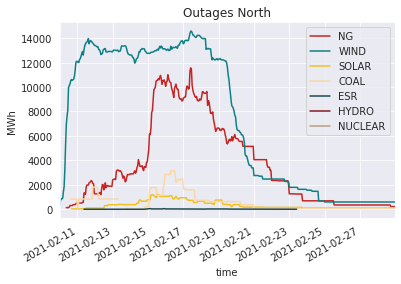

In [60]:
reductionN['2021-02'].plot()
plt.title('Outages North')
plt.ylabel('MWh')

Text(0, 0.5, 'MWh')

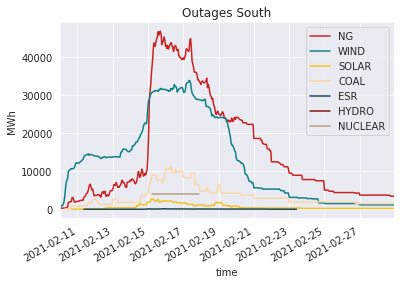

In [61]:
reductionS['2021-02'].plot()
plt.title('Outages South')
plt.ylabel('MWh')